C:\Users\manue\AppData\Local\Temp\ipykernel_1404\4241810717.py:63: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\manue\Desktop\Visualizzazione scientifica\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


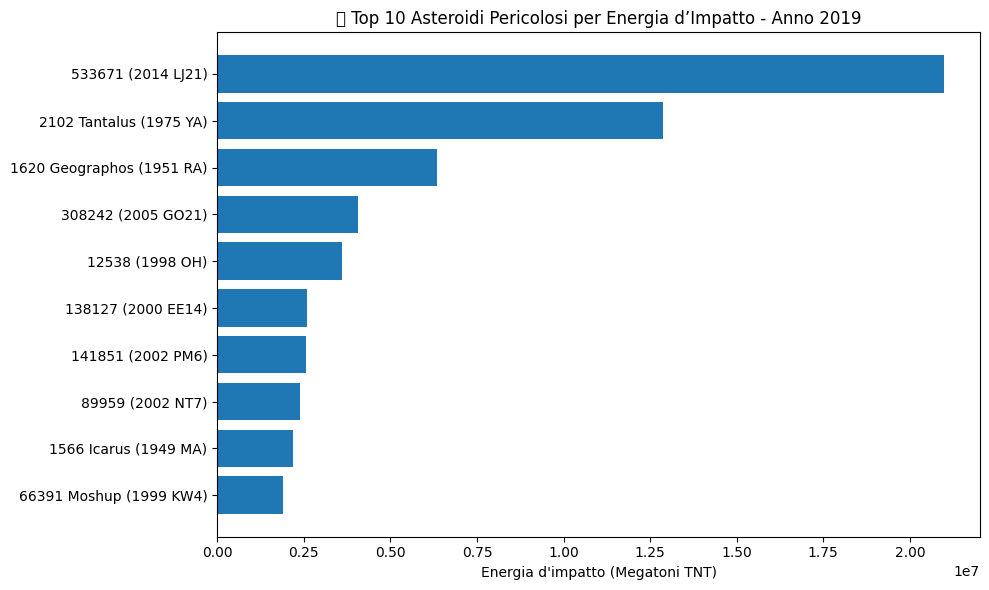

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

# Costanti fisiche
DENSITY = 3000  # kg/m^3 per asteroide roccioso
JOULES_PER_MEGATON_TNT = 4.184e15

# Carica il dataset
df = pd.read_csv('asteroid.csv')

def calcola_energia_impatti_per_anno(anno_target):
    risultati = []

    for _, row in df.iterrows():
        try:
            
            if not row['is_potentially_hazardous_asteroid']:
                continue

            
            approach_list = json.loads(row['approach_data'].replace("'", '"'))
            match_in_anno = [
                a for a in approach_list
                if a['close_approach_date'].startswith(str(anno_target))
            ]
            if not match_in_anno:
                continue

            for approach in match_in_anno:
                velocity_kph = float(approach['relative_velocity_kph'])
                velocity_mps = velocity_kph * 1000 / 3600
                diameter_km = row['estimated_diameter_km_max']
                radius_m = (diameter_km * 1000) / 2

                volume = (4/3) * np.pi * radius_m**3
                mass = DENSITY * volume
                energia_joule = 0.5 * mass * velocity_mps**2
                energia_megatoni = energia_joule / JOULES_PER_MEGATON_TNT

                risultati.append({
                    'name': row['name'],
                    'energy_megatons': energia_megatoni
                })

        except Exception as e:
            continue

    if not risultati:
        print(f"Nessun asteroide pericoloso registrato nell'anno {anno_target}")
        return

    # Crea DataFrame e mostra i Top 10
    top10 = pd.DataFrame(risultati).sort_values(by='energy_megatons', ascending=False).head(10)

    # Grafico a barre
    plt.figure(figsize=(10, 6))
    plt.barh(top10['name'], top10['energy_megatons'])
    plt.xlabel("Energia d'impatto (Megatoni TNT)")
    plt.title(f"💥 Top 10 Asteroidi Pericolosi per Energia d’Impatto - Anno {anno_target}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# --- ESECUZIONE ---
anno_input = input("Inserisci un anno (es. 2020): ")
calcola_energia_impatti_per_anno(anno_input)



## 💥 Calcolo dell’Energia d’Impatto degli Asteroidi

Per stimare il potenziale distruttivo di un asteroide che colpisce la Terra, utilizziamo la formula dell’energia cinetica:

\[
E = \frac{1}{2}mv^2
\]

Dove:
- \( E \): energia rilasciata (in joule)
- \( m \): massa stimata dell’asteroide (in kg)
- \( v \): velocità relativa al momento dell’impatto (in m/s)

---

### 🔹 1. Calcolo della Massa (𝑚)

Partendo dal diametro massimo stimato (`estimated_diameter_km_max`) fornito nel dataset, stimiamo il volume dell’asteroide assumendo che sia una sfera:

1. Calcolo del raggio in metri:
\[
r = \frac{diametro \times 1000}{2}
\]

2. Calcolo del volume della sfera:
\[
V = \frac{4}{3} \pi r^3
\]

3. Stima della massa, assumendo una densità media rocciosa di 3000 kg/m³:
\[
m = \rho \cdot V
\quad \text{con} \quad \rho = 3000 \, \text{kg/m}^3
\]

---

### 🔹 2. Conversione della Velocità (𝑣)

La velocità relativa fornita nel dataset è in km/h (`relative_velocity_kph`). Per usarla nella formula, la convertiamo in m/s:

\[
v = \frac{velocità_{kph} \times 1000}{3600}
\]

---

### 🔹 3. Energia d’Impatto (𝐸)

Inseriamo massa e velocità nella formula:

\[
E = \frac{1}{2}mv^2
\]

L’energia calcolata in joule viene poi convertita in megatoni di TNT per facilitarne l’interpretazione:

\[
1 \text{ megatone TNT} = 4.184 \times 10^{15} \text{ joules}
\]

\[
\text{Energia (Mt)} = \frac{E \text{ (joules)}}{4.184 \times 10^{15}}
\]

---


✅ Questo approccio ci consente di confrontare gli asteroidi per determinare quali abbiano il maggior potenziale distruttivo in un dato anno.


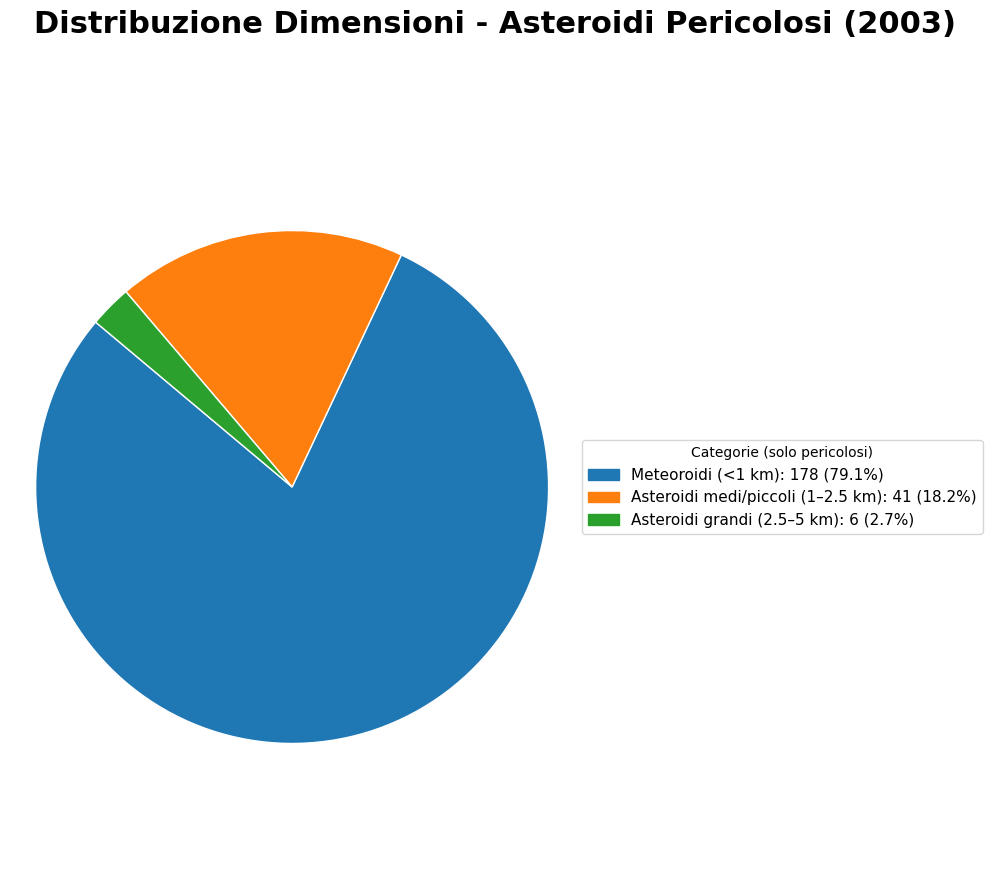

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Carica il dataset
df = pd.read_csv("asteroid.csv")

# Funzione per classificare gli asteroidi in base alla dimensione
def classifica_dimensione(d_km):
    if d_km < 1:
        return 'Meteoroidi (<1 km)'
    elif d_km < 2.5:
        return 'Asteroidi medi/piccoli (1–2.5 km)'
    elif d_km < 5:
        return 'Asteroidi grandi (2.5–5 km)'
    else:
        return 'Asteroidi giganti (≥5 km)'

# Funzione principale per creare il grafico
def grafico_dimensioni_pericolosi(anno_target):
    counts = {}

    for _, row in df.iterrows():
        try:
            if not row['is_potentially_hazardous_asteroid']:
                continue

            approaches = json.loads(row['approach_data'].replace("'", '"'))
            match_in_anno = [
                a for a in approaches
                if a['close_approach_date'].startswith(str(anno_target))
            ]
            if not match_in_anno:
                continue

            diametro = row['estimated_diameter_km_max']
            categoria = classifica_dimensione(diametro)
            counts[categoria] = counts.get(categoria, 0) + 1

        except:
            continue

    if not counts:
        print(f"Nessun asteroide pericoloso registrato nell'anno {anno_target}")
        return

    # Colori aggiornati (stile classico)
    label_colori = {
        'Meteoroidi (<1 km)': '#1f77b4',  # blu
        'Asteroidi medi/piccoli (1–2.5 km)': '#ff7f0e',  # arancione
        'Asteroidi grandi (2.5–5 km)': '#2ca02c',  # verde
        'Asteroidi giganti (≥5 km)': '#d62728'  # rosso
    }

    labels = [label for label in label_colori if counts.get(label, 0) > 0]
    sizes = [counts[label] for label in labels]
    colors = [label_colori[label] for label in labels]

    total = sum(sizes)
    legenda_testo = [
        f"{label}: {counts[label]} ({(counts[label]/total)*100:.1f}%)"
        for label in labels
    ]

    # Rettangolini colorati per la legenda
    patches = [Patch(color=label_colori[label], label=legenda_testo[i]) for i, label in enumerate(labels)]

    # Plot del grafico a torta
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.pie(
        sizes,
        labels=None,
        startangle=140,
        colors=colors,
        wedgeprops={'edgecolor': 'white'}
    )

    # Titolo grande e vicino al grafico
    plt.suptitle(
        f'Distribuzione Dimensioni - Asteroidi Pericolosi ({anno_target})',
        fontsize=22,
        fontweight='bold',
        y=0.88  # 🔽 più vicino al grafico
    )

    # Legenda a lato
    ax.legend(
        handles=patches,
        title='Categorie (solo pericolosi)',
        loc='center left',
        bbox_to_anchor=(1, 0.5),
        fontsize=11
    )

    # Layout compatto
    plt.tight_layout(rect=[0, 0, 1, 0.85])
    plt.axis('equal')
    plt.show()

# Esecuzione
anno_input = input("Inserisci un anno (es. 2020): ")
grafico_dimensioni_pericolosi(anno_input)


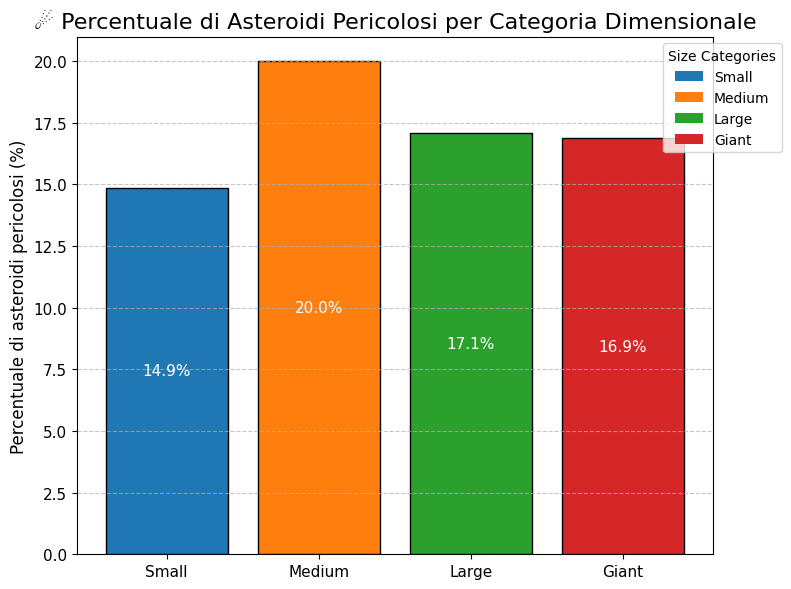

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Carica il dataset
df_asteroid = pd.read_csv('asteroid.csv')

# Classificazione semplice

def assign_size_category(diameter):
    if diameter < 1:
        return 'Small'
    elif diameter < 2.5:
        return 'Medium'
    elif diameter < 5:
        return 'Large'
    else:
        return 'Giant'

# Applica la classificazione
df_asteroid['size_category'] = df_asteroid['estimated_diameter_km_max'].apply(assign_size_category)

# Calcolo percentuale di asteroidi pericolosi per categoria
per_category = df_asteroid.groupby('size_category')['is_potentially_hazardous_asteroid'].mean() * 100

# Ordine forzato
categories = ['Small', 'Medium', 'Large', 'Giant']
per_category = per_category.reindex(categories, fill_value=0)

# Colori classici (come nel tuo primo codice)
colors = {
    'Small': '#1f77b4',   # blu
    'Medium': '#ff7f0e',  # arancione
    'Large': '#2ca02c',   # verde
    'Giant': '#d62728'    # rosso (opzionale se ci sono giganti)
}
used_colors = [colors[cat] for cat in categories]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(categories, per_category.values, color=used_colors, edgecolor='black')

# Percentuali dentro le barre
for bar, cat in zip(bars, categories):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height * 0.5,
            f"{per_category[cat]:.1f}%",
            ha='center', va='center', fontsize=11, color='white' if height > 10 else 'black')

# Titolo e assi
plt.title('☄️ Percentuale di Asteroidi Pericolosi per Categoria Dimensionale', fontsize=16)
plt.xlabel('')
plt.ylabel('Percentuale di asteroidi pericolosi (%)', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Legenda verticale (solo categorie con dati > 0)
patches = [Patch(facecolor=colors[cat], label=cat) for cat in categories if per_category[cat] > 0]
ax.legend(handles=patches, title='Size Categories', loc='upper right', bbox_to_anchor=(1.12, 1))

plt.tight_layout()
plt.show()



🛰️ Asteroidi potenzialmente pericolosi avvicinatisi nel 1990: 251
☄️ Meteoriti effettivamente caduti nel 1990: 8
📊 Percentuale meteoriti caduti rispetto agli asteroidi pericolosi: 3.19%


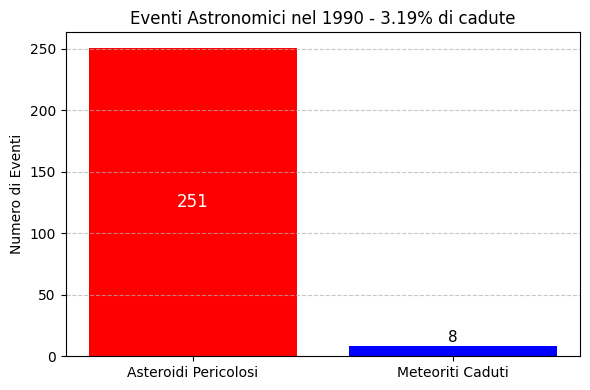

In [9]:

import pandas as pd
import ast
import matplotlib.pyplot as plt
from collections import defaultdict

# Caricamento file CSV
df_asteroid = pd.read_csv('asteroid.csv')
df_meteorite = pd.read_csv('meteorite_landings.csv')

# Filtra solo asteroidi potenzialmente pericolosi
asteroid_hazardous = df_asteroid[df_asteroid['is_potentially_hazardous_asteroid'] == True]

# Prepara dati meteoriti
df_meteorite = df_meteorite[pd.to_numeric(df_meteorite['year'], errors='coerce').notnull()]
df_meteorite['year'] = df_meteorite['year'].astype(int)
df_falls = df_meteorite[df_meteorite['fall'] == 'Fell']

def eventi_anno_specifico(anno_input):
    # Conta avvicinamenti di asteroidi pericolosi in quell'anno
    count_hazardous = 0
    for row in asteroid_hazardous['approach_data']:
        try:
            approaches = ast.literal_eval(row)
            for approach in approaches:
                if int(approach['close_approach_date'][:4]) == anno_input:
                    count_hazardous += 1
        except Exception:
            continue

    # Conta meteoriti caduti in quell'anno
    falls_in_year = df_falls[df_falls['year'] == anno_input].shape[0]

    return count_hazardous, falls_in_year

# Input utente
try:
    anno = int(input("Inserisci un anno (es. 1995): "))
    pericolosi, caduti = eventi_anno_specifico(anno)

    # Calcolo percentuale (evitando divisione per zero)
    if pericolosi > 0:
        percentuale = (caduti / pericolosi) * 100
    else:
        percentuale = 0

    # Output testo
    print(f"\n🛰️ Asteroidi potenzialmente pericolosi avvicinatisi nel {anno}: {pericolosi}")
    print(f"☄️ Meteoriti effettivamente caduti nel {anno}: {caduti}")
    print(f"📊 Percentuale meteoriti caduti rispetto agli asteroidi pericolosi: {percentuale:.2f}%")

    # Grafico
    plt.figure(figsize=(6, 4))
    values = [pericolosi, caduti]
    labels = ['Asteroidi Pericolosi', 'Meteoriti Caduti']
    colors = ['red', 'blue']
    bars = plt.bar(labels, values, color=colors)

    # Annotazioni
    for bar in bars:
        height = bar.get_height()
        if height < 20:
            # Valori bassi -> etichetta sopra la barra
            plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
                     f"{int(height)}", ha='center', va='bottom', fontsize=11, color='black')
        else:
            # Etichetta centrata nella barra
            plt.text(bar.get_x() + bar.get_width() / 2, height * 0.5,
                     f"{int(height)}", ha='center', va='center', fontsize=12, color='white')

    plt.title(f"Eventi Astronomici nel {anno} - {percentuale:.2f}% di cadute")
    plt.ylabel('Numero di Eventi')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

except ValueError:
    print("Per favore inserisci un numero valido.")
